[1. 데이터 설명 및 보기](#1._데이터_설명_및_보기)

[2. 데이터 기초 분석/탐색](#2._데이터_기초_분석/탐색)

[3. 데이터 클린징](#3._데이터_클린징)

[4. 통계 또는 머신러닝](#4._통계_또는_머신러닝)

[5. 결론 및 본인 차별화 포인트](#5._결론_및_본인_차별화_포인트)

# 데이터 설명 및 보기

사용하는 데이터 이름: Students Performance

|열 이름|뜻|데이터|
|---|---|---|
|gender|성별|female, male|
|race/ethnicity|인종/민족|groupA,B,C,D,E|
|parental level of education|부모의 교육 수준|some high school, high school, some college, bachelor's degree, associate's degree, master's degree|
|lunch|점심의 상태|free/reduced, standard|
|test preparation course|시험 준비 과정|none, complete|
|math score|수학 점수|연속형 데이터|
|reading score|읽기 점수|연속형 데이터|
|writing score|쓰기 점수|연속형 데이터|

- 데이터 준비

In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

file_path = "StudentsPerformance.csv"

st_data = pd.read_csv(file_path)

st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [34]:
#데이터 백업
st_data_copy_backup = st_data.copy()
st_data.to_csv('StudentsPerformance_backup.csv')

# 데이터 백업 잘 되었는지 check
file_path = 'StudentsPerformance_backup.csv'
st_data_csv_backup = pd.read_csv(file_path)
st_data_csv_backup

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


- 데이터 보기

In [35]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [36]:
st_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- 데이터 재구조화

gender 변수의 male, female 값을 0,1로 변환한다.

In [37]:
gender_dict = {'male':0, 'female':1}
st_data['gender'] = st_data['gender'].map(gender_dict)

race/ethnicity를 그룹 분석

In [38]:
st_data.groupby(['race/ethnicity']).mean()

,gender,math score,reading score,writing score
race/ethnicity,,,,
group A,0.404494,61.629213,64.674157,62.674157
group B,0.547368,63.452632,67.352632,65.600000
group C,0.564263,64.463950,69.103448,67.827586
group D,0.492366,67.362595,70.030534,70.145038
group E,0.492857,73.821429,73.028571,71.407143


race/ethnicity 변수의 group A, group B, group C, group D, group E 값을 0, 1, 2, 3, 4로 변환한다.

In [39]:
race_dict = {'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4}
st_data['race/ethnicity'] = st_data['race/ethnicity'].map(race_dict)

parental level of education을 그룹 분석한다

In [40]:
st_data.groupby(['parental level of education']).mean()

,gender,race/ethnicity,math score,reading score,writing score
parental level of education,,,,,
associate's degree,0.522523,2.265766,67.882883,70.927928,69.896396
bachelor's degree,0.533898,2.169492,69.389831,73.000000,73.381356
high school,0.479592,2.020408,62.137755,64.704082,62.448980
master's degree,0.610169,2.457627,69.745763,75.372881,75.677966
some college,0.522124,2.283186,67.128319,69.460177,68.840708
some high school,0.508380,2.000000,63.497207,66.938547,64.888268


master's degree인 부모의 자식의 시험 점수 평균이 가장 높고, high school인 부모의 자식의 시험 점수 평균이 가장 낮다.

parental level of education 변수의 값을 아래와 같이 변환한다.

some high school : 0
high school : 1
some college : 2
bachelor's degree : 3
associate's degree : 4
master's degree : 5

In [41]:
eduLevel_dict = {'some high school':0, 'high school':1, 'some college':2, 'bachelor\'s degree':3, 'associate\'s degree':4, 'master\'s degree':5}
st_data['parental level of education'] =  st_data['parental level of education'].map(eduLevel_dict)

lunch에 대해 그룹 분석을 한다

In [42]:
st_data.groupby(['lunch']).mean()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
lunch,,,,,,
free/reduced,0.532394,2.101408,2.219718,58.921127,64.653521,63.022535
standard,0.510078,2.213953,2.165891,70.034109,71.654264,70.823256


표준 점심을 먹은 사람들의 점수가 비교적 높다.

각 free/reduced, standard를 0,1로 변환한다.

In [43]:
lunch_dict = {'free/reduced':0, 'standard':1}
st_data['lunch'] = st_data['lunch'].map(lunch_dict)

test preparation course를 그룹분석한다

In [44]:
st_data.groupby(['test preparation course']).mean()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
test preparation course,,,,,,,
completed,0.513966,2.201117,2.167598,0.634078,69.695531,73.893855,74.418994
none,0.520249,2.158879,2.194704,0.651090,64.077882,66.534268,64.504673


테스트 준비 과정을 이수한 사람들의 평균 점수가 더욱 높다.

각 completed, none 값을 1,0로 변환한다

In [45]:
test_dict = {'none':0, 'completed':1}
st_data['test preparation course'] = st_data['test preparation course'].map(test_dict)

지금까지 한 데이터 변환이 잘 적용되었는지 확인한다

In [46]:
st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,3,1,0,72,72,74
1,1,2,2,1,1,69,90,88
2,1,1,5,1,0,90,95,93
3,0,0,4,0,0,47,57,44
4,0,2,2,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95
996,0,2,1,0,0,62,55,55
997,1,2,1,0,1,59,71,65
998,1,3,2,1,1,68,78,77


math score, reading score, writing score의 평균을 낸 컬럼을 만든다.

소수점이 나올 경우 소수점을 없애기 위해 정수형으로 변환한다.

In [47]:
st_data['avg_score'] = (st_data['math score'] + st_data['reading score'] + st_data['writing score'])/3

st_data['avg_score'] = st_data['avg_score'].astype(int)

In [48]:
st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,1,1,3,1,0,72,72,74,72
1,1,2,2,1,1,69,90,88,82
2,1,1,5,1,0,90,95,93,92
3,0,0,4,0,0,47,57,44,49
4,0,2,2,1,0,76,78,75,76
...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94
996,0,2,1,0,0,62,55,55,57
997,1,2,1,0,1,59,71,65,65
998,1,3,2,1,1,68,78,77,74


위에서 lunch 컬럼과 test preparation course 컬럼의 그룹분석 결과를 보고, 
표준 양의 밥을 먹고 시험 준비 과정도 거친 학생이 더욱 시험을 잘 봤을 것이라는 예측을 하게 되었다.

밥을 먹고 시험 준비 과정도 거친 학생에 대한 컬럼을 만든다.

In [49]:
s1 = st_data['lunch']
s2 = st_data['test preparation course']

st_data['lap'] = s1+s2

st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,1
1,1,2,2,1,1,69,90,88,82,2
2,1,1,5,1,0,90,95,93,92,1
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,1
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,2
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,1
998,1,3,2,1,1,68,78,77,74,2


(lap=2) : 밥을 먹고 시험 준비 과정도 거친 학생

(lap=1) : 밥을 먹었지만 시험 준비 과정은 거치치 않은 학생 / 밥은 먹지 않았지만 시험 준비 과정은 거친 학생

(lap=0) : 밥도 먹지 않고, 시험 준비 과정도 거치지 않은 학생

In [51]:
st_data.groupby(['lap']).mean()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
lap,,,,,,,,,
0,0.531250,2.035714,2.165179,0.000000,0.000000,56.508929,61.602679,58.736607,58.611607
1,0.519126,2.222222,2.234973,0.761384,0.238616,66.919854,69.342441,68.253188,67.848816
2,0.502203,2.193833,2.083700,1.000000,1.000000,73.533040,76.215859,76.766520,75.185022


평균 점수를 통해 점심과 테스트 준비를 둘다 완료한 학생의 점수와 그렇지 못한 학생과의 차이가 꽤 있음을 알 수 있다.

컬럼의 이름에 스페이스가 있기 때문에, 그 부분을 언더바로 대체하고, 간략화시킨다.

In [52]:
st_data = st_data.rename({'parental level of education':'parent_edu_level', 'test preparation course':'test_prepare', 'math score':'math_score', 'reading score': 'reading_score', 'writing score':'writing_score'}, axis = 'columns')	#열의 이름 수정
st_data

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,1
1,1,2,2,1,1,69,90,88,82,2
2,1,1,5,1,0,90,95,93,92,1
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,1
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,2
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,1
998,1,3,2,1,1,68,78,77,74,2


# 데이터클린징

In [53]:
import missingno as msno

st_data.isnull().sum()

gender              0
race/ethnicity      0
parent_edu_level    0
lunch               0
test_prepare        0
math_score          0
reading_score       0
writing_score       0
avg_score           0
lap                 0
dtype: int64

결측치 시각화 진행

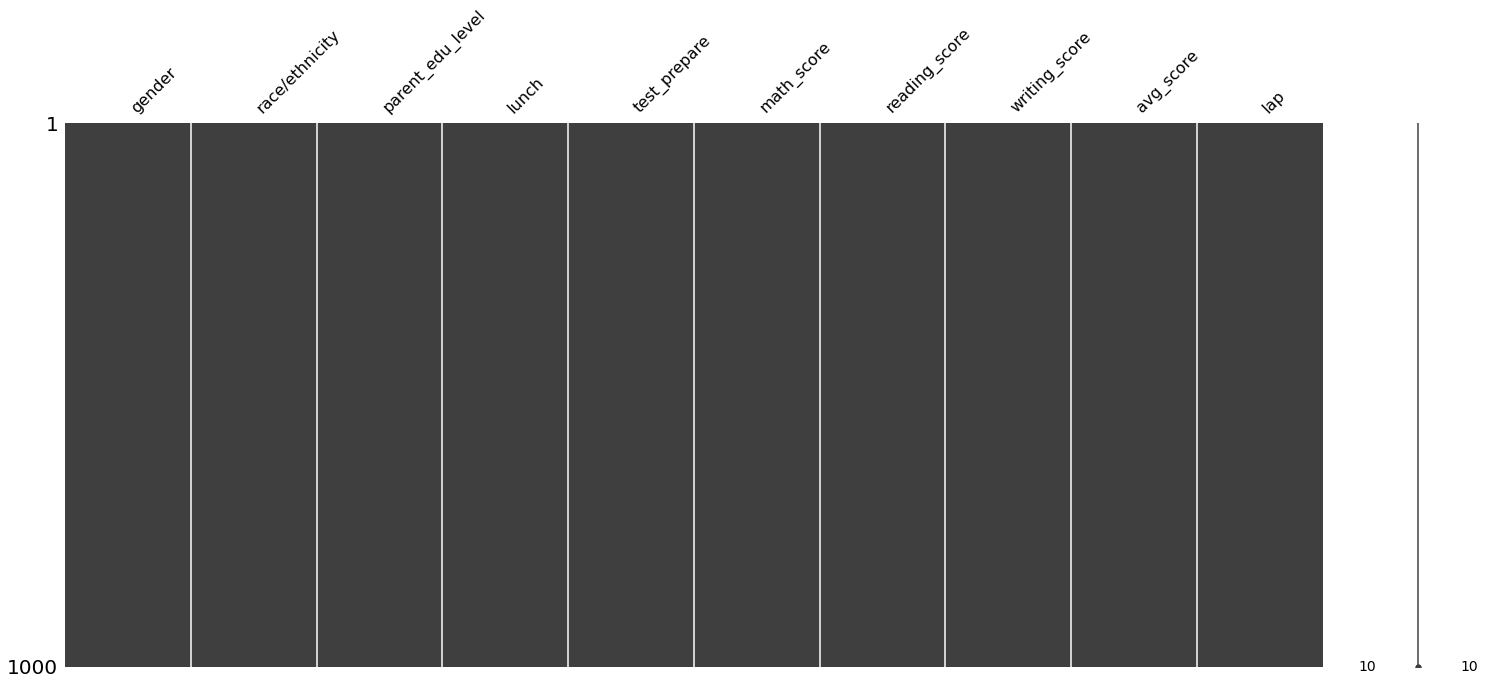

In [54]:
msno.matrix(st_data)

결측치 존재하지 않음

In [55]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            1000 non-null   int64
 1   race/ethnicity    1000 non-null   int64
 2   parent_edu_level  1000 non-null   int64
 3   lunch             1000 non-null   int64
 4   test_prepare      1000 non-null   int64
 5   math_score        1000 non-null   int64
 6   reading_score     1000 non-null   int64
 7   writing_score     1000 non-null   int64
 8   avg_score         1000 non-null   int32
 9   lap               1000 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 74.3 KB


- 이상치 확인

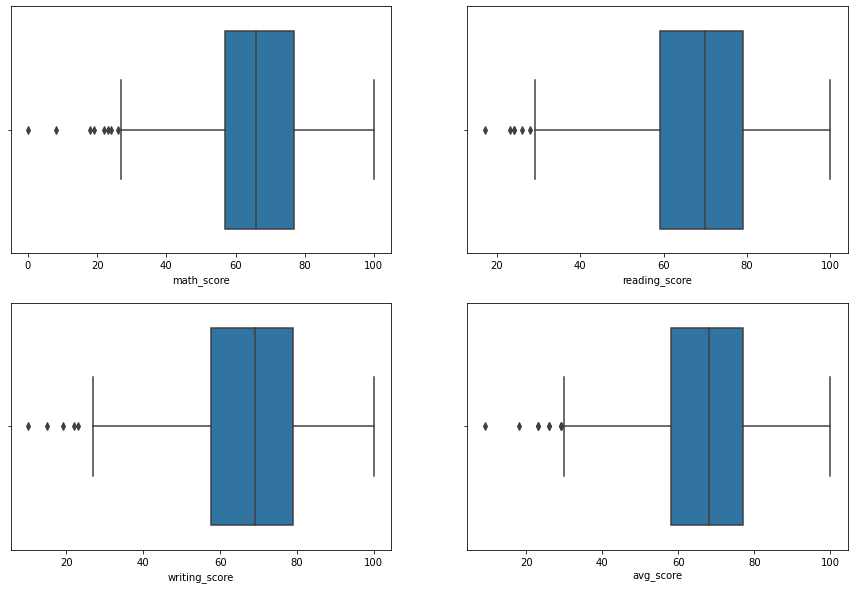

In [58]:
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2) # 표를 넣을 4칸 생성
figure.set_size_inches(15,10) # 표 하나의 사이즈 정하기

sns.boxplot(x = "math_score", data = st_data, ax=ax1)
sns.boxplot(x = "reading_score", data = st_data, ax=ax2)
sns.boxplot(x = "writing_score", data = st_data, ax=ax3)
sns.boxplot(x = "avg_score", data = st_data, ax=ax4)

In [59]:
st_data.describe()

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,2.174000,2.185000,0.645000,0.358000,66.08900,69.169000,68.054000,67.445000,1.003000
std,0.499926,1.157179,1.554732,0.478753,0.479652,15.16308,14.600192,15.195657,14.263324,0.671895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,9.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,58.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,0.000000,66.00000,70.000000,69.000000,68.000000,1.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,77.000000,1.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,100.000000,2.000000


In [60]:
#st_data2 데이터프레임 생성하여 이상치 제거 이후의 데이터 삽입
st_data2 = st_data[(st_data["math_score"]>26) & (st_data["reading_score"]>29)]

st_data2

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,1
1,1,2,2,1,1,69,90,88,82,2
2,1,1,5,1,0,90,95,93,92,1
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,1
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,2
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,1
998,1,3,2,1,1,68,78,77,74,2


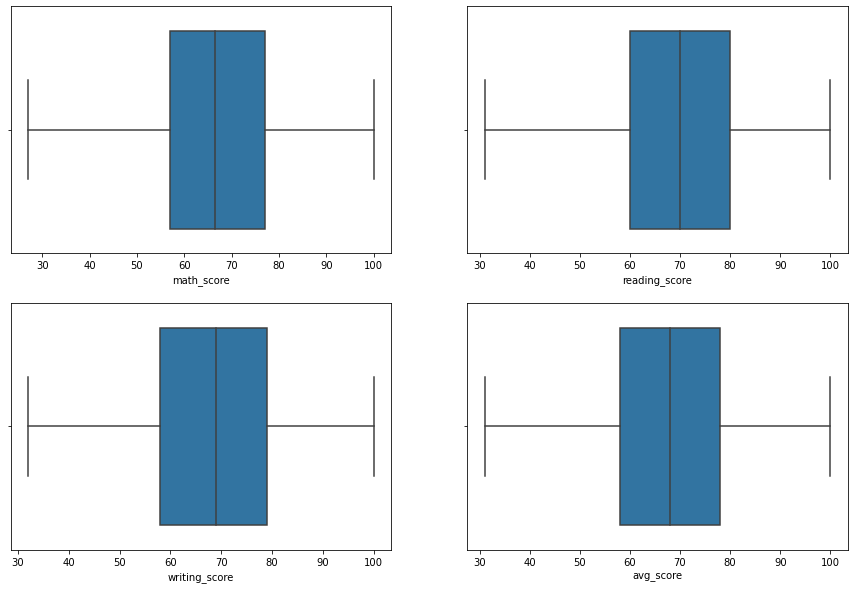

In [61]:
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2) # 표를 넣을 4칸 생성
figure.set_size_inches(15,10) # 표 하나의 사이즈 정하기

sns.boxplot(x = "math_score", data = st_data2, ax=ax1)
sns.boxplot(x = "reading_score", data = st_data2, ax=ax2)
sns.boxplot(x = "writing_score", data = st_data2, ax=ax3)
sns.boxplot(x = "avg_score", data = st_data2, ax=ax4)

이상치 제거가 완료되었다

# 데이터 시각화

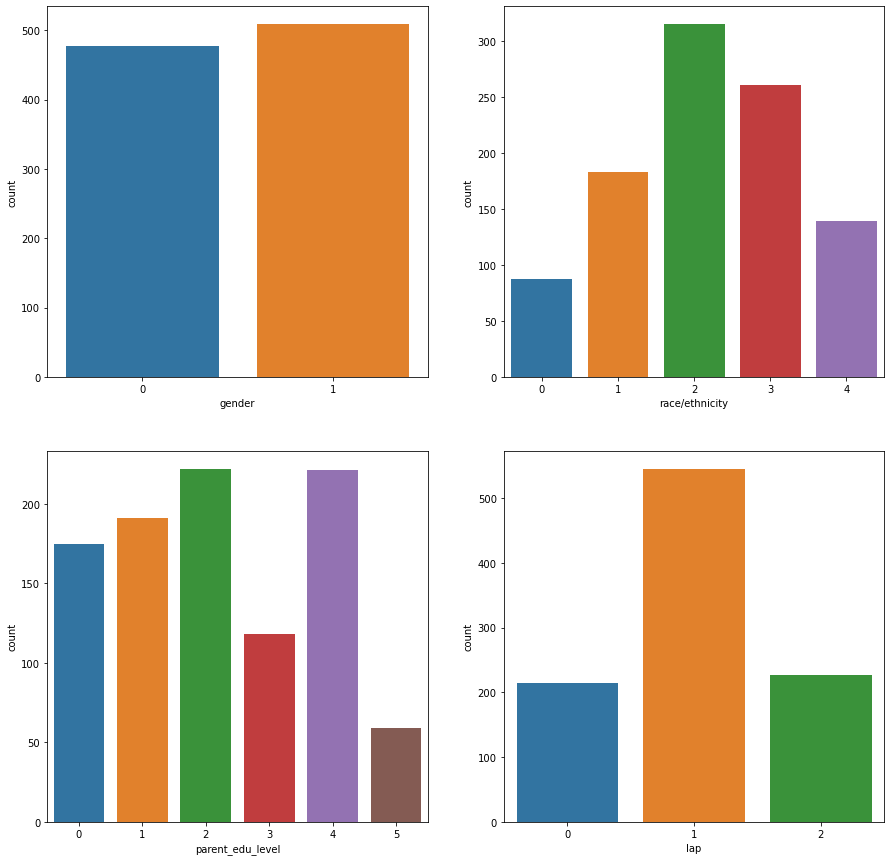

In [62]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,15)

sns.countplot('gender', data=st_data2, ax = ax1)
sns.countplot('race/ethnicity', data=st_data2, ax = ax2)
sns.countplot('parent_edu_level', data=st_data2, ax = ax3)
sns.countplot('lap', data=st_data2, ax = ax4)

1. gender: 남자보다 여자가 조금 더 많다

2. race/ethnicity: group C가 가장 많고, group A가 가장 적다

3. parent_edu_level: master's degree를 부모로 둔 학생이 가장 적다.

4. lap: 점심과 시험 사전 준비 중 1개만 완료한 사람이 가장 많다.

math_score, reading_score, writing_score 컬럼 대신 이들의 평균을 구한 avg_score로 데이터 시각화를 진행한다.

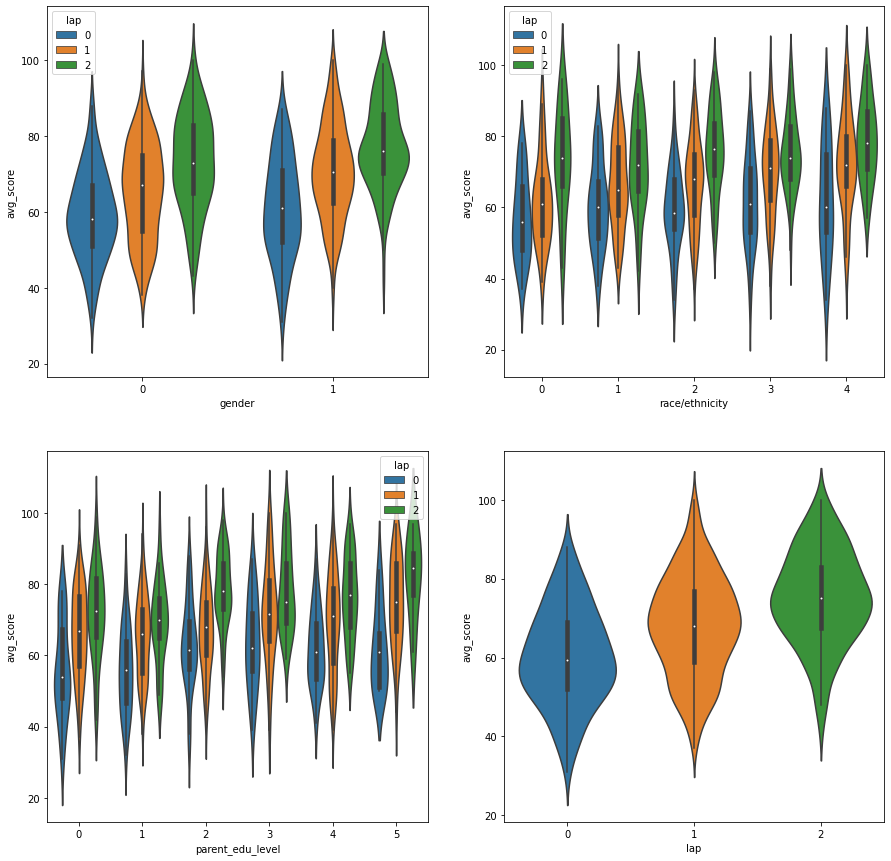

In [68]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 15)

sns.violinplot('gender', 'avg_score', hue='lap', data=st_data2, ax=ax1)
sns.violinplot('race/ethnicity', 'avg_score', hue='lap', data=st_data2, ax=ax2)
sns.violinplot('parent_edu_level', 'avg_score', hue='lap', data=st_data2, ax=ax3)
sns.violinplot('lap', 'avg_score', data=st_data2, ax=ax4)

점심과 시험 사전 준비 두가지 모두를 한 학생이 성별, 인종, 부모의 학업 성취도와 관련없이 점수가 더 높게 나오는 것을 알 수 있다.

데이터 시각화 참고 자료: http://growthj.link/python-seaborn-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-%EC%B4%9D%EC%A0%95%EB%A6%AC/

# 통계 또는 머신러닝 및 결론

In [69]:
#상관관계 파악(상관계수)
corrMatt = st_data2[['gender', 'race/ethnicity', 'parent_edu_level', 'lunch', 'test_prepare', 'math_score', 'reading_score', 'writing_score', 'avg_score', 'lap']]
corrMatt = corrMatt.corr()
corrMatt

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
gender,1.000000,0.003648,0.042826,-0.018811,-0.005461,-0.163481,0.267108,0.329214,0.151231,-0.017334
race/ethnicity,0.003648,1.000000,0.097657,0.036425,0.014281,0.208966,0.134255,0.154412,0.175539,0.036228
parent_edu_level,0.042826,0.097657,1.000000,-0.024106,-0.013522,0.132291,0.161775,0.198617,0.173255,-0.026902
lunch,-0.018811,0.036425,-0.024106,1.000000,-0.024123,0.337886,0.208412,0.225033,0.272563,0.695471
test_prepare,-0.005461,0.014281,-0.013522,-0.024123,1.000000,0.164597,0.230529,0.307128,0.247632,0.701569
math_score,-0.163481,0.208966,0.132291,0.337886,0.164597,1.000000,0.798881,0.780668,0.909343,0.359155
reading_score,0.267108,0.134255,0.161775,0.208412,0.230529,0.798881,1.000000,0.949844,0.967328,0.314254
writing_score,0.329214,0.154412,0.198617,0.225033,0.307128,0.780668,0.949844,1.000000,0.961545,0.381158
avg_score,0.151231,0.175539,0.173255,0.272563,0.247632,0.909343,0.967328,0.961545,1.000000,0.372274
lap,-0.017334,0.036228,-0.026902,0.695471,0.701569,0.359155,0.314254,0.381158,0.372274,1.000000


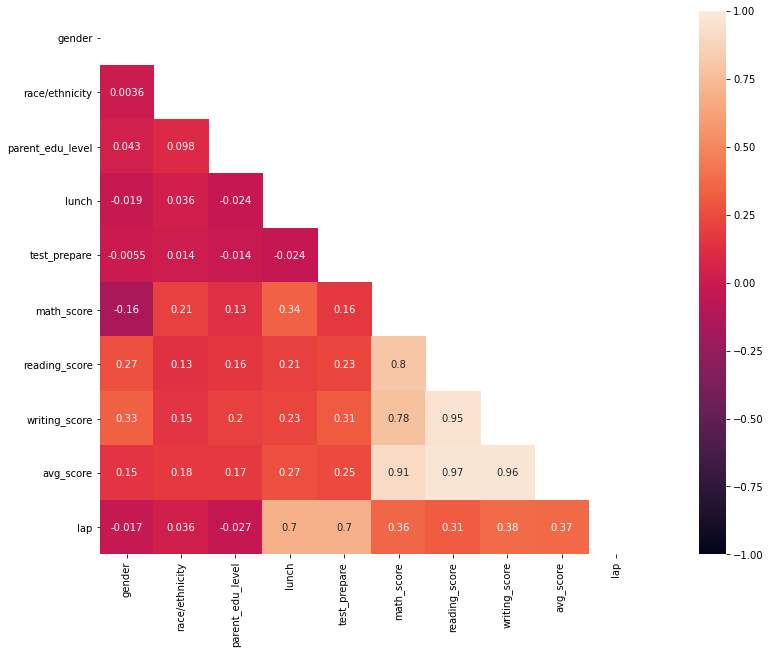

In [70]:
mask = np.zeros_like(corrMatt, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

figure, ax = plt.subplots()
figure.set_size_inches(20,10)

#vmin값과 vmax값은 -1, 1값으로 지정하여야 보기 좋습니다.
sns.heatmap(corrMatt, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

- 각 점수 데이터는 서로 강한 상관관계를 가지고 있음을 알 수 있다

- lap은 lunch와 test_prepare 데이터의 함 -> 높은 상관관계를 가지고 있다고 나옴

- lunch와 math_score은 뚜렷한 상관관계 有

- gender와 writing_score은 뚜렷한 상관관계 有

- test_prepare와 writing_score은 뚜렷한 상관관계 有

- lap과 math_score, reading_score, writing_score, avg_score은 뚜렷한 상관관계 有

- 회기분석

In [78]:
# 단순선형회귀 모형
import statsmodels.api as sm
st_reg=sm.OLS.from_formula("lap ~ math_score + reading_score + writing_score", st_data2).fit()
st_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lap   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     77.35
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           6.40e-45
Time:                        22:41:22   Log-Likelihood:                -897.63
No. Observations:                 986   AIC:                             1803.
Df Residuals:                     982   BIC:                             1823.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1478      0.100     -1.474      0.141      -0.345       0.049
math_score        0.0117      0.002      5.228      0.000       0.007       0.016
reading_score    -0.0306      0.005     -6.624      0.000      -0.040      -0.022
writing_score     0.0366      0.004      8.541      0.000       0.028       0.045
==============================================================================
Omnibus:                       19.670   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.978
Skew:                           0.016   Prob(JB):                      0.00413
Kurtosis:                       2.484   Cond. No.                         631.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R-square: R-squared의 값이 0.191이다. 0~1 사이에 있으므로 설명력이 없지 않은 상태.

2. 회귀모형 coef 계수를 살펴보면 intercept는 -0.1478, math_score는 0.0117, reading_score는 -0.0306, writing_score는 0.0366이다. 

3. P > |t|(유의확률) P > |t|의 값은 전부 0.05보다 작은 값이 나왔고, 이는 math_score, reading_score, writing_score 변수가 lap 변수에 유의미하게 영향을 미친다는 의미이다.

4. Durbin-Watson 검정 Durbin-Watson의 값은 2.017이므로, 1.5~2.5 사이이므로 회귀모형이 적합하다.

5. No.observations No.observations(더빈왓슨, DW검정)값은 986이다. 971개의 데이터 쌍을 가지고 회귀분석을 실시하였다.

6. Df Residuals Df Residuals값은 967이다

# 머신러닝 시작

로지스틱 회귀 분석을 사용하였다. 종속변수 lap, 독립변수 math_score, reading_score, writing_score로 하였다.

In [79]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [81]:
x_data=st_data2.iloc[:, 5:8]
y_data=st_data2.iloc[:,-1]
x_data=x_data.values
y_data=y_data.values

print("x_data ->",x_data)
print("y_data ->", y_data)

x_data -> [[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]
y_data -> [1 2 1 0 1 1 2 0 1 0 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 2 1 0
 1 0 0 1 1 1 0 1 2 1 1 2 1 1 1 1 1 0 2 1 2 1 0 0 1 1 1 0 1 0 1 1 2 0 0 1 0
 2 2 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 2 2 0 1 1 2 1 2 2 1 1 2 0 1 1 1 1 1
 2 1 0 1 1 1 2 2 2 0 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 2 1 0 1 1 1 1 0 2 1 2 1
 2 1 1 2 1 0 2 0 1 1 0 1 1 2 1 1 2 1 2 1 1 1 1 2 1 2 1 2 1 0 1 1 1 1 1 2 0
 1 1 2 1 2 2 1 1 0 0 0 2 0 1 1 1 2 1 2 0 0 1 0 1 2 2 1 0 0 2 2 1 0 1 2 0 1
 1 0 2 1 1 1 1 2 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 2 0 2 1 1 1 0 2 1 1 1 2 0 1
 1 0 1 1 2 0 1 1 0 1 2 1 2 2 0 0 1 1 0 1 1 2 2 1 0 2 1 1 2 1 1 0 2 2 1 0 1
 0 2 1 2 1 2 1 0 0 1 1 2 1 2 1 2 1 1 0 1 1 1 0 0 1 1 2 1 1 1 2 1 1 0 2 1 1
 0 1 2 2 1 1 1 2 0 1 1 1 2 1 1 1 1 1 0 1 1 2 1 0 1 1 2 0 0 1 1 1 1 2 1 0 1
 1 1 1 1 2 0 0 0 1 1 0 1 1 1 1 1 2 2 0 0 1 1 1 2 1 0 2 1 1 2 1 1 2 2 2 1 2
 1 1 2 1 1 1 1 2 1 2 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 2 2 1 0 1 0 2 0 2 1 1 1
 1

In [82]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

In [83]:
# 로지스틱 모델링
estimator=LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,verbose=0,warm_start=False,n_jobs=1)
estimator.fit(x_train,y_train)

c:\users\윤혜주\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# train 학습
y_predict = estimator.predict(x_train)
score=metrics.accuracy_score(y_train,y_predict)
print('train score: ',score)

train score:  0.6043478260869565


In [85]:
# test 평가
y_predict = estimator.predict(x_test)
score=metrics.accuracy_score(y_test,y_predict)
print('test score: ',score)

test score:  0.5405405405405406
